# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview

In [2]:
online_retail = pd.read_excel("C:\\Users\\HP\\Desktop\\Python exercises\\Statistical Analysis\\Data Analytics Projects\\Customer_Life_Tıme_Value\\Data\Online Retail.xlsx")

online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
online = online_retail

In [4]:
online.shape

(541909, 8)

In [5]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
online.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
online.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [9]:
# Remove the time(hour, minute, second) from the InvoiveDate column
online["InvoiceDate"] = pd.to_datetime(online["InvoiceDate"], format = "%m/%d/%Y %H:%M").dt.date

In [13]:
# missing values "CustomerID"
# we will not remove description missing values because we do not use in the analysis.
online = online[pd.notnull(online["CustomerID"])]

In [17]:
# keep records with non-negative quantity
online = online[online["Quantity"] > 0]

In [20]:
# add a new column called Total_Sales : quantity x unit price
online["Total_Sales"] = online["Quantity"] * online["UnitPrice"]

# we use only three columns in the analysis : "CustomerID", "InvoiceDate", "Total_Sales"
necessary_columns = ["CustomerID", "InvoiceDate", "Total_Sales"]

online = online[necessary_columns]

online.head()

,CustomerID,InvoiceDate,Total_Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [43]:
# Most profit customers.
profits = online.groupby("CustomerID").agg("sum").sort_values(by = "Total_Sales", ascending = False).iloc[:10]

profits

,Total_Sales
CustomerID,
14646.0,280206.02
18102.0,259657.30
17450.0,194550.79
16446.0,168472.50
14911.0,143825.06
12415.0,124914.53
14156.0,117379.63
17511.0,91062.38
16029.0,81024.84


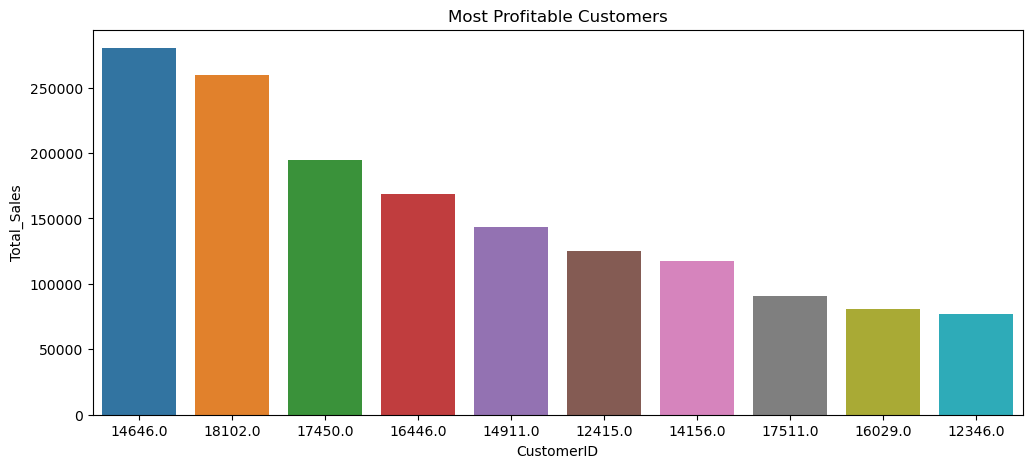

In [51]:
plt.figure(figsize=(12, 5))
sns.barplot(x = profits.index, y = profits["Total_Sales"], data = profits, order = profits.index)
plt.title("Most Profitable Customers")
plt.show()